In [1061]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders.cat_boost import CatBoostEncoder 



In [1062]:
Data_frame = pd.read_csv(r'laptop_price.csv', encoding='latin1')
Data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [1063]:
Data_frame.shape

(1303, 13)

In [1064]:
Data_frame.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#data preprocessing


In [1065]:
#Remove units from Ram and weight 
Data_frame['Ram']=Data_frame['Ram'].str.replace('GB','').astype('Int32')
Data_frame['Weight']=Data_frame['Weight'].str.replace('kg','').astype('float64')
Data_frame.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<Axes: xlabel='Company'>

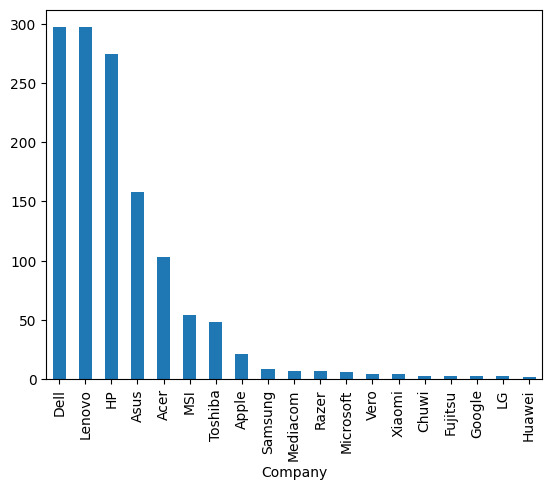

In [1066]:
Data_frame['Company'].value_counts().plot(kind='bar')

In [1067]:
label_encoder = LabelEncoder()
Data_frame['Company'] = label_encoder.fit_transform(Data_frame['Company'])
Data_frame.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,7,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [1068]:
Data_frame['Product'].value_counts()

Product
XPS 13                                 30
Inspiron 3567                          29
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
L403NA-GA013TS (N3350/4GB/32GB/W10)     1
IdeaPad 500-15ISK                       1
GP62M 7RDX                              1
V110-15ISK (i3-6006U/4GB/1TB/No         1
15-BA015wm (E2-7110/4GB/500GB/W10)      1
Name: count, Length: 618, dtype: int64

In [1069]:
catboost=CatBoostEncoder()
encoded_product = catboost.fit_transform(Data_frame['Product'],Data_frame['laptop_ID'])
Data_frame['Product']=encoded_product
Data_frame.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,660.155794,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,1,660.155794,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,7,660.155794,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,1,330.577897,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,1,221.718598,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<Axes: xlabel='TypeName'>

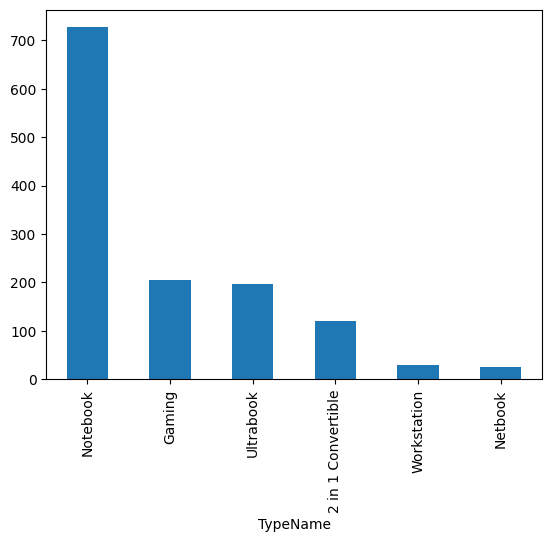

In [1070]:
Data_frame['TypeName'].value_counts().plot(kind='bar')

In [1071]:
Data_frame['TypeName'] = label_encoder.fit_transform(Data_frame['TypeName'])

Data_frame



,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,660.155794,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,1,660.155794,4,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,7,660.155794,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,1,330.577897,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,1,221.718598,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,1083.385265,0,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,1317,10,992.631159,0,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,1318,10,910.431159,3,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,7,1085.385265,3,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [1072]:
#resolution handeling to ppi
Data_frame['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [1073]:
Data_frame['TouchScreen']=Data_frame['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
print(Data_frame['TouchScreen'].value_counts())

TouchScreen
0    1111
1     192
Name: count, dtype: int64


In [1074]:
Data_frame['lps']=Data_frame['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0 )
print(Data_frame['lps'].value_counts())

lps
0    938
1    365
Name: count, dtype: int64


In [1075]:
Data_frame['HD']=Data_frame['ScreenResolution'].apply(lambda x:1 if 'HD' in x else 0 )
print(Data_frame['HD'].value_counts())

HD
1    916
0    387
Name: count, dtype: int64


In [1076]:
new = Data_frame['ScreenResolution'].str.split('x',n=1,expand=True)
Data_frame['X_res'] = new[0]
Data_frame['Y_res'] = new[1]
Data_frame['X_res'] = Data_frame['X_res'].str.extract(r'(\d+)').astype(float)
Data_frame['Y_res'] = Data_frame['Y_res'].astype(float)
Data_frame.drop('ScreenResolution', axis=1, inplace=True)
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   laptop_ID    1303 non-null   int64  
 1   Company      1303 non-null   int64  
 2   Product      1303 non-null   float64
 3   TypeName     1303 non-null   int64  
 4   Inches       1303 non-null   float64
 5   Cpu          1303 non-null   object 
 6   Ram          1303 non-null   Int32  
 7   Memory       1303 non-null   object 
 8   Gpu          1303 non-null   object 
 9   OpSys        1303 non-null   object 
 10  Weight       1303 non-null   float64
 11  Price_euros  1303 non-null   float64
 12  TouchScreen  1303 non-null   int64  
 13  lps          1303 non-null   int64  
 14  HD           1303 non-null   int64  
 15  X_res        1303 non-null   float64
 16  Y_res        1303 non-null   float64
dtypes: Int32(1), float64(6), int64(6), object(4)
memory usage: 169.4+ KB


In [1077]:
#PPI=((x^2 + Y^2)^0.5)/nb of inches  

Data_frame['PPI']=((((Data_frame['X_res'])**2))+(((Data_frame['Y_res'])**2)))**0.5 /Data_frame['Inches'].astype('float')
Data_frame.drop(columns=['X_res','Y_res','Inches'],axis=1,inplace=True)
Data_frame


,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,lps,HD,PPI
0,1,1,660.155794,4,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,226.983005
1,2,1,660.155794,4,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,127.677940
2,3,7,660.155794,3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1,141.211998
3,4,1,330.577897,4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,220.534624
4,5,1,221.718598,4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,1083.385265,0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1,157.350512
1299,1317,10,992.631159,0,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,1,276.053530
1300,1318,10,910.431159,3,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,0,111.935204
1301,1319,7,1085.385265,3,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,0,100.454670


In [1078]:
Data_frame['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [1079]:
Data_frame['cpu brand'] = Data_frame['Cpu'].apply(lambda x: x.split()[0])
Data_frame['cpu Freq'] = Data_frame['Cpu'].apply(lambda x: x.split()[-1])
Data_frame['cpu Freq']=Data_frame['cpu Freq'].str.replace('GHz','').astype(float)
Data_frame

,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,lps,HD,PPI,cpu brand,cpu Freq
0,1,1,660.155794,4,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,226.983005,Intel,2.3
1,2,1,660.155794,4,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,127.677940,Intel,1.8
2,3,7,660.155794,3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1,141.211998,Intel,2.5
3,4,1,330.577897,4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,220.534624,Intel,2.7
4,5,1,221.718598,4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,226.983005,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,1083.385265,0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1,157.350512,Intel,2.5
1299,1317,10,992.631159,0,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,1,276.053530,Intel,2.5
1300,1318,10,910.431159,3,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,0,111.935204,Intel,1.6
1301,1319,7,1085.385265,3,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,0,100.454670,Intel,2.5


In [1080]:
# Splitting the 'cpu' column into three separate columns

Data_frame['cpu Model'] = Data_frame['Cpu'].apply(lambda x: ' '.join(x.split()[1:-1]))
Data_frame['cpu Model']=label_encoder.fit_transform(Data_frame['cpu Model'])
Data_frame.drop('Cpu', axis=1, inplace=True)


In [1081]:
Data_frame

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,lps,HD,PPI,cpu brand,cpu Freq,cpu Model
0,1,1,660.155794,4,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,226.983005,Intel,2.3,40
1,2,1,660.155794,4,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,127.677940,Intel,1.8,40
2,3,7,660.155794,3,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1,141.211998,Intel,2.5,46
3,4,1,330.577897,4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,220.534624,Intel,2.7,54
4,5,1,221.718598,4,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,226.983005,Intel,3.1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,1083.385265,0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1,157.350512,Intel,2.5,55
1299,1317,10,992.631159,0,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,1,276.053530,Intel,2.5,55
1300,1318,10,910.431159,3,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,0,111.935204,Intel,1.6,20
1301,1319,7,1085.385265,3,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,0,100.454670,Intel,2.5,55


<Axes: xlabel='Ram', ylabel='Price_euros'>

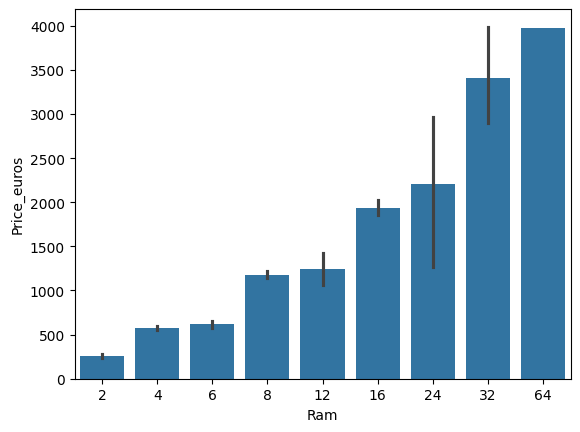

In [1082]:
sns.barplot(x=Data_frame['Ram'],y=Data_frame['Price_euros'])


In [1083]:
#memmory
print(Data_frame['Memory'].value_counts())



Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [1084]:
Data_frame['Memory'] = Data_frame['Memory'].astype(str).replace('\.0', '', regex=True)
Data_frame['Memory'] = Data_frame['Memory'].str.replace('GB', '')
Data_frame['Memory'] = Data_frame['Memory'].str.replace('TB', '000')
new = Data_frame['Memory'].str.split("+", n=1, expand=True)

Data_frame['first'] = new[0]
Data_frame['first'] = Data_frame['first'].str.strip()

Data_frame['second'] = new[1]

Data_frame['Layer1HDD'] = Data_frame['first'].apply(lambda x: 1 if "HDD" in x else 0)
Data_frame['Layer1SSD'] = Data_frame['first'].apply(lambda x: 1 if "SSD" in x else 0)
Data_frame['Layer1Hybrid'] = Data_frame['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
Data_frame['Layer1Flash_Storage'] = Data_frame['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

Data_frame['first'] = Data_frame['first'].str.replace(r'\D', '', regex=True)



Data_frame['second'].fillna("0", inplace=True)

Data_frame['Layer2HDD'] = Data_frame['second'].apply(lambda x: 1 if "HDD" in x else 0)
Data_frame['Layer2SSD'] = Data_frame['second'].apply(lambda x: 1 if "SSD" in x else 0)
Data_frame['Layer2Hybrid'] = Data_frame['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
Data_frame['Layer2Flash_Storage'] = Data_frame['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

Data_frame['second'] = Data_frame['second'].str.replace(r'\D', '', regex=True)

Data_frame['first'] = Data_frame['first'].astype(int)
Data_frame['second'] = Data_frame['second'].astype(int)

Data_frame['HDD'] = (Data_frame['first'] * Data_frame['Layer1HDD'] + Data_frame['second'] * Data_frame['Layer2HDD'])
Data_frame['SSD'] = (Data_frame['first'] * Data_frame['Layer1SSD'] + Data_frame['second'] * Data_frame['Layer2SSD'])
Data_frame['Hybrid'] = (Data_frame['first'] * Data_frame['Layer1Hybrid'] + Data_frame['second'] * Data_frame['Layer2Hybrid'])
Data_frame['Flash_Storage'] = (Data_frame['first'] * Data_frame['Layer1Flash_Storage'] + Data_frame['second'] * Data_frame['Layer2Flash_Storage'])

Data_frame.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage' ], inplace=True)
Data_frame.drop(columns=['Memory'],inplace=True)

Data_frame.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

C:\Users\Hassan\AppData\Local\Temp\ipykernel_5016\2907082675.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_frame['second'].fillna("0", inplace=True)


In [1085]:
# Display the DataFrame
(Data_frame)

,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,lps,HD,PPI,cpu brand,cpu Freq,cpu Model,HDD,SSD
0,1,1,660.155794,4,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,0,226.983005,Intel,2.3,40,0,128
1,2,1,660.155794,4,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,127.677940,Intel,1.8,40,0,0
2,3,7,660.155794,3,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1,141.211998,Intel,2.5,46,0,256
3,4,1,330.577897,4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,0,220.534624,Intel,2.7,54,0,512
4,5,1,221.718598,4,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,0,226.983005,Intel,3.1,40,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,1083.385265,0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1,157.350512,Intel,2.5,55,0,128
1299,1317,10,992.631159,0,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,1,276.053530,Intel,2.5,55,0,512
1300,1318,10,910.431159,3,2,Intel HD Graphics,Windows 10,1.50,229.00,0,0,0,111.935204,Intel,1.6,20,0,0
1301,1319,7,1085.385265,3,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,0,100.454670,Intel,2.5,55,1000,0


In [1086]:
Data_frame.drop(columns=['OpSys'],inplace=True)
Data_frame.drop(columns=['Gpu'],inplace=True)
Data_frame.drop(columns=['HDD'],inplace=True)
Data_frame.drop(columns=['Product'],inplace=True)
Data_frame.drop(columns=['cpu brand'],inplace=True)



Data_frame

,laptop_ID,Company,TypeName,Ram,Weight,Price_euros,TouchScreen,lps,HD,PPI,cpu Freq,cpu Model,SSD
0,1,1,4,8,1.37,1339.69,0,1,0,226.983005,2.3,40,128
1,2,1,4,8,1.34,898.94,0,0,0,127.677940,1.8,40,0
2,3,7,3,8,1.86,575.00,0,0,1,141.211998,2.5,46,256
3,4,1,4,16,1.83,2537.45,0,1,0,220.534624,2.7,54,512
4,5,1,4,8,1.37,1803.60,0,1,0,226.983005,3.1,40,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,0,4,1.80,638.00,1,1,1,157.350512,2.5,55,128
1299,1317,10,0,16,1.30,1499.00,1,1,1,276.053530,2.5,55,512
1300,1318,10,3,2,1.50,229.00,0,0,0,111.935204,1.6,20,0
1301,1319,7,3,6,2.19,764.00,0,0,0,100.454670,2.5,55,0


In [1087]:
Data_frame['cpu'] = Data_frame['cpu Model'] * Data_frame['cpu Freq']
Data_frame['Screen_Specs']= ((Data_frame['lps']**2 + Data_frame['TouchScreen']**2+Data_frame['PPI']**2)/2).astype(float)

Data_frame.drop(columns=['cpu Model'],inplace=True)
Data_frame.drop(columns=['cpu Freq'],inplace=True)
Data_frame.drop(columns=['TouchScreen'],inplace=True)
Data_frame.drop(columns=['lps'],inplace=True)
Data_frame.drop(columns=['PPI'],inplace=True)
Data_frame.info()
Data_frame.corr()['Price_euros']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop_ID     1303 non-null   int64  
 1   Company       1303 non-null   int64  
 2   TypeName      1303 non-null   int64  
 3   Ram           1303 non-null   Int32  
 4   Weight        1303 non-null   float64
 5   Price_euros   1303 non-null   float64
 6   HD            1303 non-null   int64  
 7   SSD           1303 non-null   int64  
 8   cpu           1303 non-null   float64
 9   Screen_Specs  1303 non-null   float64
dtypes: Int32(1), float64(4), int64(5)
memory usage: 98.1 KB


laptop_ID       0.067830
Company         0.140371
TypeName       -0.127313
Ram             0.743007
Weight          0.210370
Price_euros     1.000000
HD              0.377209
SSD             0.670799
cpu             0.616598
Screen_Specs    0.305233
Name: Price_euros, dtype: float64

In [1088]:
Data_frame.corr()

,laptop_ID,Company,TypeName,Ram,Weight,Price_euros,HD,SSD,cpu,Screen_Specs
laptop_ID,1.000000,0.106702,-0.083170,-0.028607,-0.011798,0.067830,-0.081767,-0.058803,-0.008881,0.027940
Company,0.106702,1.000000,-0.007718,0.046508,-0.129610,0.140371,0.110409,0.127260,0.079007,0.064481
TypeName,-0.083170,-0.007718,1.000000,-0.242862,-0.267002,-0.127313,-0.138402,-0.075933,-0.169118,-0.010030
Ram,-0.028607,0.046508,-0.242862,1.000000,0.383874,0.743007,0.354870,0.603634,0.545298,0.158312
Weight,-0.011798,-0.129610,-0.267002,0.383874,1.000000,0.210370,0.117763,-0.062742,0.331566,-0.435749
Price_euros,0.067830,0.140371,-0.127313,0.743007,0.210370,1.000000,0.377209,0.670799,0.616598,0.305233
HD,-0.081767,0.110409,-0.138402,0.354870,0.117763,0.377209,1.000000,0.384312,0.427460,0.279409
SSD,-0.058803,0.127260,-0.075933,0.603634,-0.062742,0.670799,0.384312,1.000000,0.407192,0.370398
cpu,-0.008881,0.079007,-0.169118,0.545298,0.331566,0.616598,0.427460,0.407192,1.000000,0.080000
Screen_Specs,0.027940,0.064481,-0.010030,0.158312,-0.435749,0.305233,0.279409,0.370398,0.080000,1.000000


In [1089]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [1090]:
from sklearn.metrics import mean_absolute_error as mae

X = Data_frame.drop(columns="Price_euros")
Y = Data_frame['Price_euros']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Train the models
models = {
    'ElasticNet': ElasticNet(alpha=0.35, l1_ratio=0.75),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=8),
    'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=3)
}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mae_value = mae(Y_test, y_pred)
    print(f'{model_name} Mean Absolute Error: {mae_value:.4f}')


predictions = pd.DataFrame({
    'Actual': Y_test,
    'ElasticNet': models['ElasticNet'].predict(X_test),
    'DecisionTree': models['DecisionTreeRegressor'].predict(X_test),
    'KNeighbors': models['KNeighborsRegressor'].predict(X_test)
})



ElasticNet Mean Absolute Error: 269.8659
DecisionTreeRegressor Mean Absolute Error: 232.9419
KNeighborsRegressor Mean Absolute Error: 325.5642


$$Conclusion:$$

<h4>The evaluation of the regression models on the given dataset reveals the following Mean Absolute Errors (MAE):

ElasticNet: MAE = 269.8659
DecisionTreeRegressor: MAE = 232.9419
KNeighborsRegressor: MAE = 325.5642
Among the models tested, the DecisionTreeRegressor demonstrated the lowest MAE, indicating it performed the best in terms of prediction accuracy on this dataset. The ElasticNet model followed, showing relatively close performance to the Decision Tree model but with slightly higher error. The KNeighborsRegressor had the highest MAE, suggesting it was less effective in predicting the target variable compared to the other models.

These results suggest that, for this particular dataset, the Decision Tree Regressor is the most suitable model among those tested, providing the most accurate predictions. Further tuning and validation could be beneficial for optimizing model performance.<h4>